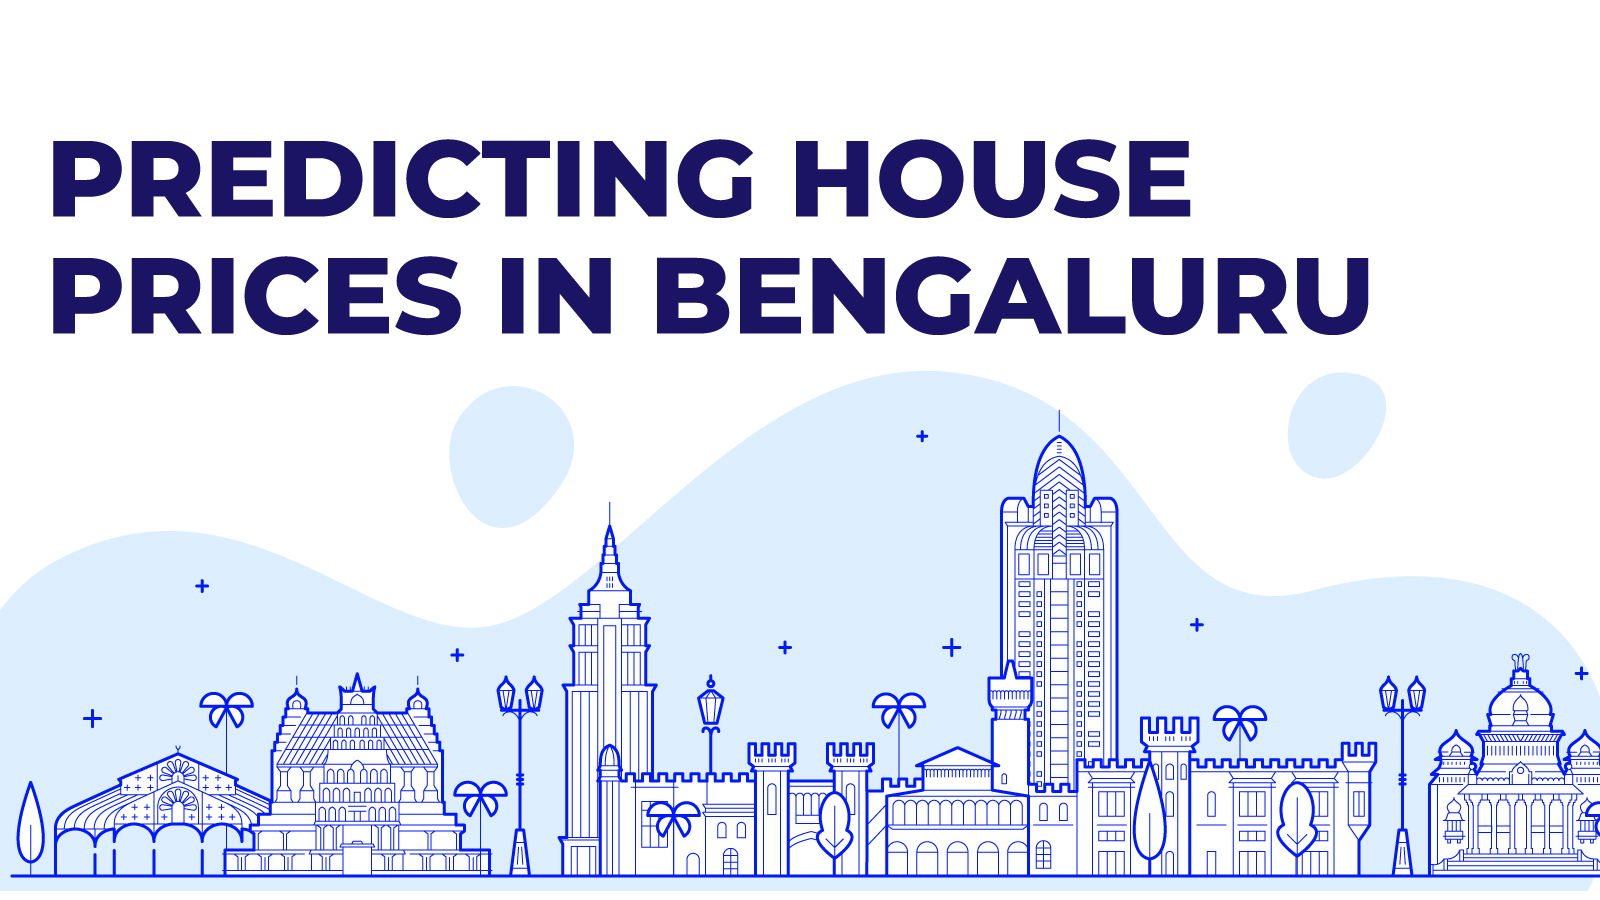

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import mitosheet
import matplotlib.pyplot as plt
from dabl import plot

In [3]:
train = pd.read_csv(r"F:\Hackathon\MachineHack\House_Prices_in_Bengaluru\Train.csv")

In [4]:
test = pd.read_csv(r"F:\Hackathon\MachineHack\House_Prices_in_Bengaluru\Test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Target looks like regression


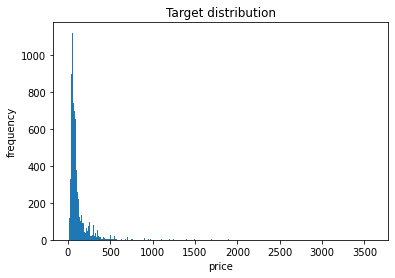

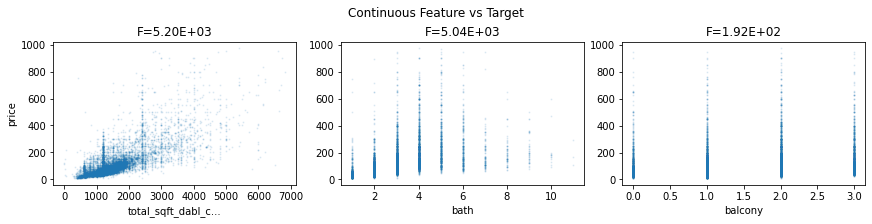

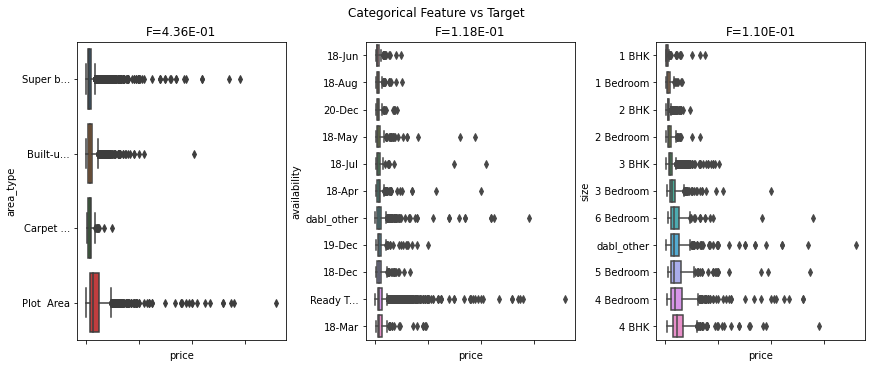

In [6]:
plot(train,"price")
plt.show()

Target looks like regression


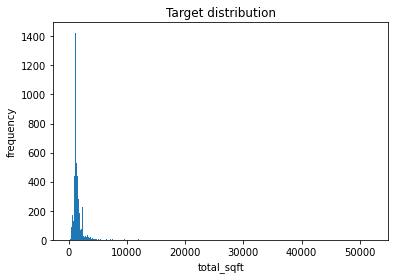

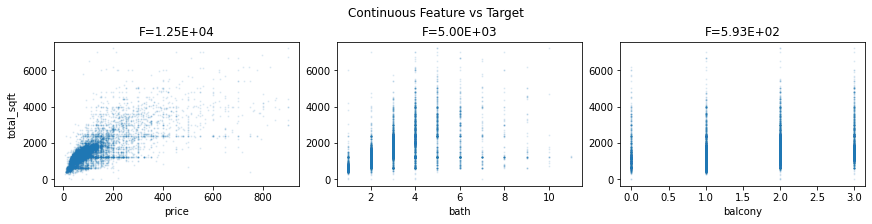

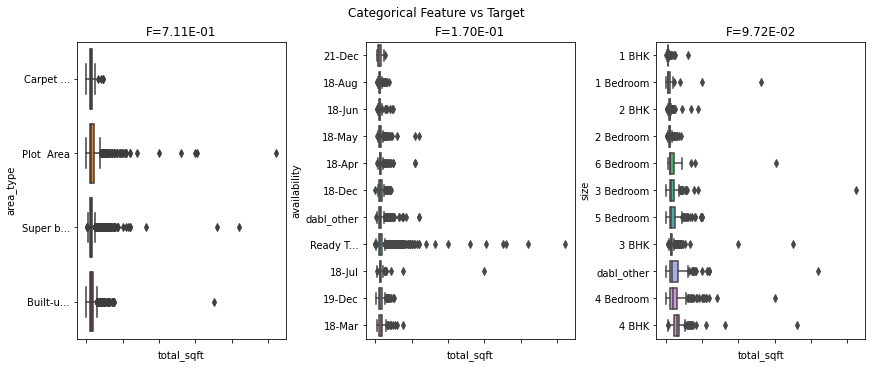

In [7]:
plot(train,"total_sqft")
plt.show()

Target looks like classification
Linear Discriminant Analysis training set score: 0.322


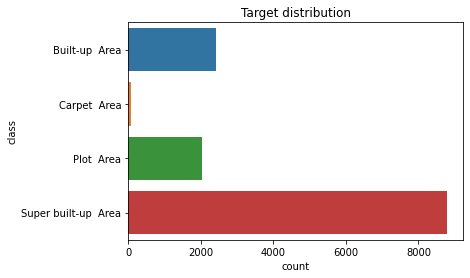

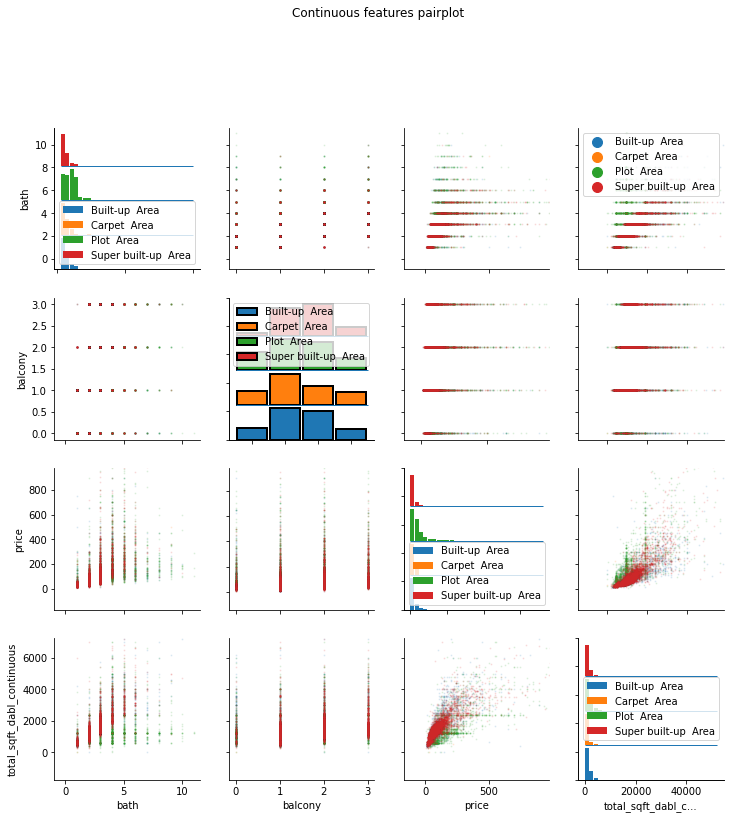

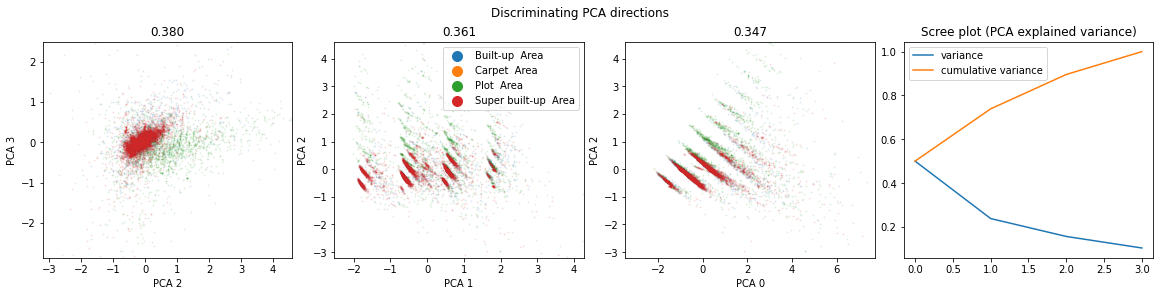

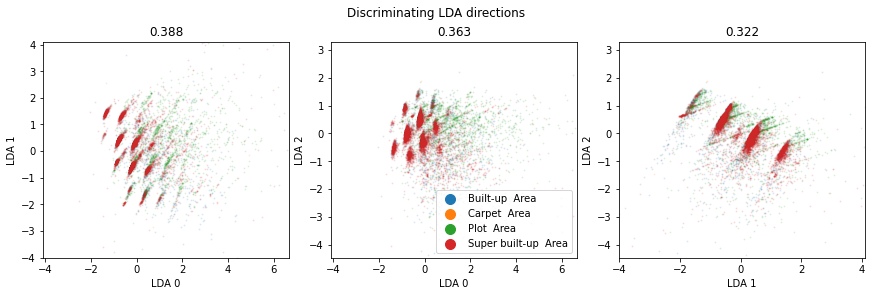

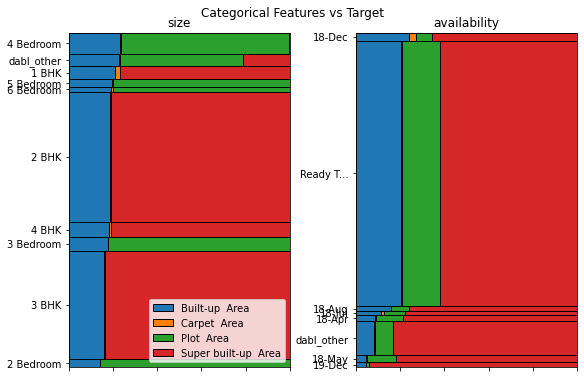

In [11]:
plot(train,"area_type")
plt.show()

## Data Cleaning & Feature Engineering

#### Train Dataset

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [13]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
train = train.drop(['society'], axis=1)
train = train.drop(['size'], axis=1)
train = train.drop(['location'], axis=1)
train = train.drop(['bath'], axis=1)
train = train.drop(['balcony'], axis=1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   total_sqft    13320 non-null  object 
 3   price         13320 non-null  float64
dtypes: float64(1), object(3)
memory usage: 416.4+ KB


In [16]:
train.head()

,area_type,availability,total_sqft,price
0,Super built-up Area,19-Dec,1056,39.07
1,Plot Area,Ready To Move,2600,120.00
2,Built-up Area,Ready To Move,1440,62.00
3,Super built-up Area,Ready To Move,1521,95.00
4,Super built-up Area,Ready To Move,1200,51.00


In [17]:
train.to_csv("F:\Hackathon\MachineHack\House_Prices_in_Bengaluru\Train_csv.csv")

#### Test Dataset

In [18]:
test.shape

(1480, 9)

In [19]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [20]:
test = test.drop(['price'], axis = 1)
test = test.drop(['society'], axis = 1)
test.head()

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,1225,2.0,2.0
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,2400,9.0,2.0
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,1650,5.0,2.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,1322,3.0,1.0
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,1161,2.0,1.0


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   total_sqft    1480 non-null   object 
 5   bath          1473 non-null   float64
 6   balcony       1411 non-null   float64
dtypes: float64(2), object(5)
memory usage: 81.1+ KB


In [22]:
test = test.drop(['bath'], axis = 1)
test = test.drop(['balcony'], axis = 1)
test = test.drop(['size'], axis = 1)
test = test.drop(['location'], axis = 1)
test.head()

,area_type,availability,total_sqft
0,Super built-up Area,Ready To Move,1225
1,Plot Area,Ready To Move,2400
2,Plot Area,18-Apr,1650
3,Super built-up Area,Ready To Move,1322
4,Super built-up Area,Ready To Move,1161


In [23]:
test.to_csv("F:\Hackathon\MachineHack\House_Prices_in_Bengaluru\Test_csv.csv")

AutoML

In [24]:
import h2o
from h2o.automl import H2OAutoML
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.321-b07, mixed mode)
  Starting server from C:\Users\Lulus\pyproj\h2o\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Lulus\AppData\Local\Temp\tmp7sc0rvsf
  JVM stdout: C:\Users\Lulus\AppData\Local\Temp\tmp7sc0rvsf\h2o_Lulus_started_from_python.out
  JVM stderr: C:\Users\Lulus\AppData\Local\Temp\tmp7sc0rvsf\h2o_Lulus_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_Lulus_12aedg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.637 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [25]:
train = h2o.import_file("F:\Hackathon\MachineHack\House_Prices_in_Bengaluru\Train_csv.csv")
test = h2o.import_file("F:\Hackathon\MachineHack\House_Prices_in_Bengaluru\Test_csv.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
# Identify predictors and response
x = train.columns
y = "price"
x.remove(y)

In [27]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
21:08:38.522: AutoML: XGBoost is not available; skipping it.
21:08:38.545: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
21:08:38.545: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220402_210838_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,51.0,51.0,13522.0,4.0,4.0,4.0,8.0,16.0,13.372549




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6317.847624640686
RMSE: 79.48488928494955
MAE: 36.40511196941227
RMSLE: 0.397009713566994
Mean Residual Deviance: 6317.847624640686

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 9057.665792923774
RMSE: 95.17176993690815
MAE: 39.042876763008934
RMSLE: 0.41353129807221095
Mean Residual Deviance: 9057.665792923774

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,38.979206,1.312529,41.059288,38.000534,39.457146,37.933796,38.445270
1,mean_residual_deviance,9165.527000,1890.423000,12366.645500,7911.216300,9107.719000,8807.053000,7635.005400
2,mse,9165.527000,1890.423000,12366.645500,7911.216300,9107.719000,8807.053000,7635.005400
3,r2,0.583304,0.051853,0.534403,0.539724,0.655873,0.615618,0.570902
4,residual_deviance,9165.527000,1890.423000,12366.645500,7911.216300,9107.719000,8807.053000,7635.005400
5,rmse,95.361850,9.463501,111.205420,88.945020,95.434370,93.845894,87.378520
6,rmsle,0.410823,0.006159,0.415051,0.416135,0.411157,0.411217,0.400557



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-04-02 21:09:12,2.459 sec,0.0,148.966082,74.395841,22190.893476
1,,2022-04-02 21:09:12,2.470 sec,5.0,115.855296,54.308716,13422.449597
2,,2022-04-02 21:09:12,2.483 sec,10.0,99.799130,45.729948,9959.866251
3,,2022-04-02 21:09:12,2.496 sec,15.0,91.893602,41.728454,8444.434019
4,,2022-04-02 21:09:12,2.511 sec,20.0,87.592455,39.414808,7672.438166
...,...,...,...,...,...,...,...
7,,2022-04-02 21:09:12,2.543 sec,35.0,82.174964,37.146219,6752.724723
8,,2022-04-02 21:09:12,2.553 sec,40.0,81.328657,36.908582,6614.350489
9,,2022-04-02 21:09:12,2.565 sec,45.0,80.536171,36.647237,6486.074884
10,,2022-04-02 21:09:12,2.576 sec,50.0,79.567123,36.440058,6330.927005



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,total_sqft,834142400.0,1.000000,0.776589
1,availability,84889752.0,0.101769,0.079033
2,C1,82677800.0,0.099117,0.076973
3,area_type,72400232.0,0.086796,0.067405


In [28]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_1_20220402_210838_model_2,9057.67,95.1718,9057.67,39.0429,0.413531
StackedEnsemble_BestOfFamily_4_AutoML_1_20220402_210838,9061.28,95.1908,9061.28,38.9695,0.404397
StackedEnsemble_AllModels_6_AutoML_1_20220402_210838,9114.13,95.4679,9114.13,38.8681,0.402237
StackedEnsemble_BestOfFamily_6_AutoML_1_20220402_210838,9129.88,95.5504,9129.88,39.0558,0.408705
StackedEnsemble_AllModels_3_AutoML_1_20220402_210838,9185.22,95.8395,9185.22,38.9467,nan
StackedEnsemble_AllModels_2_AutoML_1_20220402_210838,9351.59,96.7036,9351.59,39.2597,0.405994
StackedEnsemble_AllModels_4_AutoML_1_20220402_210838,9359.98,96.747,9359.98,39.1547,0.404141
StackedEnsemble_BestOfFamily_3_AutoML_1_20220402_210838,9504.18,97.4894,9504.18,39.4102,0.407129
StackedEnsemble_AllModels_1_AutoML_1_20220402_210838,9511.96,97.5293,9511.96,39.6144,0.409592
GBM_3_AutoML_1_20220402_210838,9581.47,97.885,9581.47,39.5897,nan


In [29]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220402_210838_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,51.0,51.0,13522.0,4.0,4.0,4.0,8.0,16.0,13.372549




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6317.847624640686
RMSE: 79.48488928494955
MAE: 36.40511196941227
RMSLE: 0.397009713566994
Mean Residual Deviance: 6317.847624640686

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 9057.665792923774
RMSE: 95.17176993690815
MAE: 39.042876763008934
RMSLE: 0.41353129807221095
Mean Residual Deviance: 9057.665792923774

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,38.979206,1.312529,41.059288,38.000534,39.457146,37.933796,38.445270
1,mean_residual_deviance,9165.527000,1890.423000,12366.645500,7911.216300,9107.719000,8807.053000,7635.005400
2,mse,9165.527000,1890.423000,12366.645500,7911.216300,9107.719000,8807.053000,7635.005400
3,r2,0.583304,0.051853,0.534403,0.539724,0.655873,0.615618,0.570902
4,residual_deviance,9165.527000,1890.423000,12366.645500,7911.216300,9107.719000,8807.053000,7635.005400
5,rmse,95.361850,9.463501,111.205420,88.945020,95.434370,93.845894,87.378520
6,rmsle,0.410823,0.006159,0.415051,0.416135,0.411157,0.411217,0.400557



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-04-02 21:09:12,2.459 sec,0.0,148.966082,74.395841,22190.893476
1,,2022-04-02 21:09:12,2.470 sec,5.0,115.855296,54.308716,13422.449597
2,,2022-04-02 21:09:12,2.483 sec,10.0,99.799130,45.729948,9959.866251
3,,2022-04-02 21:09:12,2.496 sec,15.0,91.893602,41.728454,8444.434019
4,,2022-04-02 21:09:12,2.511 sec,20.0,87.592455,39.414808,7672.438166
...,...,...,...,...,...,...,...
7,,2022-04-02 21:09:12,2.543 sec,35.0,82.174964,37.146219,6752.724723
8,,2022-04-02 21:09:12,2.553 sec,40.0,81.328657,36.908582,6614.350489
9,,2022-04-02 21:09:12,2.565 sec,45.0,80.536171,36.647237,6486.074884
10,,2022-04-02 21:09:12,2.576 sec,50.0,79.567123,36.440058,6330.927005



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,total_sqft,834142400.0,1.000000,0.776589
1,availability,84889752.0,0.101769,0.079033
2,C1,82677800.0,0.099117,0.076973
3,area_type,72400232.0,0.086796,0.067405


In [30]:
preds = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [31]:
preds.columns=['price'] 

In [32]:
preds.head()

price
65.6984
319.624
233.596
72.242
54.5157
95.0718
303.077
51.8954
85.9161
209.302


In [33]:
submission = preds.as_data_frame(use_pandas=True)

In [34]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1480 non-null   float64
dtypes: float64(1)
memory usage: 11.7 KB


In [35]:
submission.to_csv("F:\Hackathon\MachineHack\House_Prices_in_Bengaluru\submission.csv")